#### Glosario comandos de linux

In [ ]:
$ ls : Lista archivos y directorios.
$ pwd : Muestra el path actual.
$ mkdir : Crea nuevos directorios.
$ rm : Elimina archivos y directorios.
$ mv : Mueve o renombra archivos y directorios.
$ cp : Copia archivos y directorios.

$ strace : Traza las llamadas al sistema y señales de un programa.
$ ltrace : Traza las llamadas a funciones de librerías compartidas.

$ stat : Muestra el estado de un archivo o sistema de archivos (en un enlace simbolico info del fichero original).
$ fstat : Muestra el estado de un sistema de ficheros.
$ lstat : Muestra el estado del propio enlace.
$ touch : Actualiza los tiempos de acceso y modificación de un fichero (si no existe lo crea).

$ chmod : Cambia los permisos de un archivo o directorio.
$ chown : Cambia el propietario y grupo de un archivo o directorio.
$ chgrp : Cambia el grupo asociado a un archivo o directorio.

$ ln : Crea enlaces físicos o simbólicos entre archivos y directorios.
$ readlink : Leer el contenido de un enlace simbolico.
$ file : Muestra el tipo de un archivo.
$ file $(ls) : utiliza lo devuelto por ls como argumentos para file.

$ stat -f . : Da información del superbloque relacionado a la busqueda.
$ df -T : Información de los sistemas de ficheros que estan montados en los diferentes puntos del VFS.
$ debugfs -R "<comando> <<inodo>>" <sistema de ficheros> : Debuggea el sistema de ficheros.

$ bg %<id>: Pone un proceso en segundo plano. id es el que aparece en la ventana de jobs.
$ fg %<id>: Trae un proceso al primer plano (activa el proceso con + si no se especifica nada). id es el que aparece en la ventana de jobs.

$ top : Muestra los procesos en ejecución y su uso de recursos en tiempo real.
$ ps : Muestra una lista de los procesos en ejecución.
$ ps -aL : Muestra todos los procesos y sus threads.
$ ps -aL -o pid,tid,tgid,stat,cmd : Muestra todos los procesos y sus threads con columnas personalizadas.
$ pstree : Muestra los procesos en ejecución en forma de árbol.
$ kill : Envía una señal a un proceso para terminarlo o controlarlo.
$ nice : Ejecuta un comando con una prioridad modificada.
$ jobs : Muestra los trabajos en segundo plano.


$ gcc -o <output_file> <source_file.c> -lpthread : Compila un programa en C que utiliza pthreads (Hay veces que enlaza solo, no es necesario poner -lpthread).

#### Funciones de manejo de ficheros en C (equivalentes a comandos de Linux)

In [ ]:

int link (const chat *old, const char *new) // equivalente a $ ln
int symlink(const char *old, const char *new) // equivalente a $ ln -s
int readlink(const char *path, char *buf, size_t)

// MIRAR DIAPOSITIVA 18 TEMA 2 PARA INFO DE LAS FLAGS.
// path: donde esta el fichero, flags: como abrir el fichero, mode: 
// Devuelve un descriptor de fichero o -1 si hay error 
int open(const char *path, int flags) // Abre un fichero.
int open(const char *path, int flags, mode_t mode) // Abre un fichero con un modo (necesario para algunos flags).

// Devuelve: el numero de bytes que ha leido; 0 si ha llegado al final; -1 si hay error.
ssize_t read(int fd, void *buf, size_t count) // Lee count bytes del descriptor fd (fichero) y los guarda en buf (path); count = cantidad de datos a leer.
ssize_t write(int fd, const void *buf, size_t count) // Escribe count bytes del buffer buf en el fichero fd. Devuelve el numero de bytes escritos o -1 si hay error.
off_t lseek(int fd, off_t offset, int whence) // Cambia la posicion del cursor de lectura/escritura del fichero fd. Devuelve la nueva posicion o -1 si hay error.
int close(int fd) // Cierra el fichero fd. Devuelve 0 si todo va bien o -1 si hay error.
/*whence puede ser:
    SEEK_SET: desde el principio del fichero.
    SEEK_CUR: desde la posicion actual.
    SEEK_END: desde el final del fichero.
*/

int fsync(int fd) // Fuerza la sincronizacion de las cache.

// name: path completo
DIR *opendir(const chat *name); // Abre un directorio. Devuelve puntero al directorio.
int closedir(d);

pid_t fork(void); // Crea un proceso hijo. Devuelve el PID del hijo al padre y 0 al hijo. -1 si hay error.

CUIDADO!! NO MEZCLAR LLAMADAS AL SISTEMA DE BAJO NIVEL DE C, CON USO DE LIBRERIAS DE C++.

#### Ejercicio 4 de la hoja

In [ ]:
#include <sys/types.h>
#include <stdio.h>

int main(int argc, char *argv[]) {
    struct stat statbuf;

    int rc = lstat(argv[1], &statbuf);
    if (rc == -1) {
        perror("stat()");
        return 1; // devolver numero distinto de 0 si hay error
    }

    // Utilizacion de las macros para determinar el tipo de archivo
    if (S_DIR(statbuf.st_mode)) { // Pasas el atributo st_mode de la estructura stat
        printf("%s/\n", argv[1]); // Ponemos / para indicar que es un directorio.
    } 
    else if (S_ISREG(statbuf.st_mode)) {
        if (statbuf.st_mode & (S_IXUSR | S_XGRP | S_XOTH)) { // Usamos las mascaras de bits para ver si hay permiso de ejecucion **
            printf("%s*\n", argv[1]); // Ponemos * para indicar que es un ejecutable.
        } 
        else {
            printf("%s-\n", argv[1]); // Ponemos - para indicar que es un fichero regular.
        }
    }

    return 0; // devolver 0 si no hay error
}

#### Ejercicio 8 de la hoja

In [ ]:
# comando DD (1)
> dd if=/dev/urandom of = ./rand bs=512 bc=4 # crea un fichero y contenido random

In [ ]:
#include <fcntl.h>
#include <unistd.h>
#include <stddio.h>
#include <stdlib.h>

int main(int argc, char *argv[]){
    // APERTURA DE FICHEROS.

    int in_fd, out_fd; // Descriptores con los que vamos a trabajar.

    in_fd = open(argv[1], O_RDONLY); // Abrimos el fichero de entrada en modo solo lectura.

    if (in_fd == -1){
        perror("open() in");
        return 1;
    }
     // Abrimos el fichero de salida en modo escrituraONLY, crear si no existe, truncar el contenido.
    out_fd = open(argv[2], O_WRONLI | O_CREAT | O_TRUNC, 0444); // Ponemos en octal los modos necesarios para las flags. (Que empiece por 0 indica que es un numero octal).

    if (in_fd == -1){
        perror("open() out");
        return 1;
    }

    // Cerramos los descriptores.
    close(out_fd); 
    close(in_fd);

    // LECTURA.
    int bs = atoi(argv[3]); // Tamaño del bloque a leer.
    int count = atoi(argv[4]); // Cantidad de bloques a leer.

    char buffer[8192]; // Definimos un buffer de 8192 bytes (que sea char es importante).

    int total_bytes = 0;

    // Bucle para leer un bloque de datos.
    // Leemos por bloques por si no se puede tener toda la informacion.
    while(){
        // buffer + total_bytes: Avanza el puntero hasta donde ya ha leido.
        // bs - total_bytes: lee lo que le falta para completar el bloque.
        int rc = read(in_fd, buffer + total_bytes, bs - total_bytes);

        if (rc == 0){ // si ya se ha terminado la lectura sale del bucle
            break;
        }

        total_bytes += rc;
    }

    if (bytes == 0){

    }else if(bytes <= bs) {// El tamaño leido es menor que el de bloque.
        // Seguimos leyendo no desde el tamaño de bloque, si no desde la cantidad que se ha podido leer, de lo contrario se pierden datos.

    }

    // TODO: ESCRITURA.
        
}

#### Ejercicio 9 de la hoja

In [ ]:
#include <sys/types.h>
#include <stdio.h>

int main(int argc, char *argv[]) {
    Dir * d = opendir(argv[1]);

    struct dirent * dent;

    while ((dent = readdir(d)) != NULL) { // Recorremos el directorio hasta que readdir devuelva NULL (fin del directorio).
        char path[8192]; // Path a un archivo. Usar un define para no poner un numero a ojo.
        snprintf(path,8192,"%s/%s", argv[1], dent->d.d_name) // "%s/%s": <lo que me pasan> "/" <lo que he obtenido>
        printf("---> %s\n", dent->d_name);
        
        closedir(d)


        // Esto es feo, pero es para no complicar el ejemplo.
        struct stat statbuf;

        int rc = lstat(path, &statbuf);
        if (rc == -1) {
            perror("stat()");
            return 1; // devolver numero distinto de 0 si hay error
        }

        // Utilizacion de las macros para determinar el tipo de archivo
        if (S_DIR(statbuf.st_mode)) { // Pasas el atributo st_mode de la estructura stat
            printf("%s/\n", path); // Ponemos / para indicar que es un directorio.
        } 
        else if (S_ISREG(statbuf.st_mode)) {
            if (statbuf.st_mode & (S_IXUSR | S_XGRP | S_XOTH)) { // Usamos las mascaras de bits para ver si hay permiso de ejecucion **
                printf("%s*\n", path); // Ponemos * para indicar que es un ejecutable.
            } 
            else {
                printf("%s-\n", path); // Ponemos - para indicar que es un fichero regular.
            }
        }
    }
    return 0; // devolver 0 si no hay error
}

## Sistema de Ficheros

- Define como se van a estructurar los datos y los metadatos.
- Implementa operaciones basicas (especificas) sobre ficheros.
- El sistema de ficheros es como el champu de garnier, la chupa desde la raiz hasta la punta.
- Interfaz comun de acceso a los sistemas de ficheros.


### Virtual file sistem
- Conjunto de estructuras y datos que permite el soporte de varios tipos de sistemas de ficheros
- Tiene trozos de logica para soportar los diferentes sistemas.

La organizacion de ficheros y directorio se organiza de la siguiente forma:
- Cache de paginas y datos.
- Entrada directorio "/". Para ahorrar costes de busqueda de directorios existe el "dentry" (cache de directorio con información contenida).

    | home |
    |:------:|
    | I-nodo |
    | listas a subcontenidos |
    | . |
    | . |
    
- Cache de inodos.
- Bloque de control (super bloque), se suele encontrar (o una copia) al principio de los datos del disco, este contiene especificaciones del sistema de ficheros.
    - Tipo de sistema de fichero.
    - Tamaño de bloque.
    - Tamaño máximo de fichero.
    - Estado.
    - ...

### Ficheros
- Representacion de ficheros abirertos por un proceso.
- Contiene metodos de implementación implementados por el sistema de ficheros.
- Diferentes objetos fichero pueden referir al mismo archivo.
- Puntero al fichero desplazado con un offset desde el inicio del bloque que se esta leyendo.

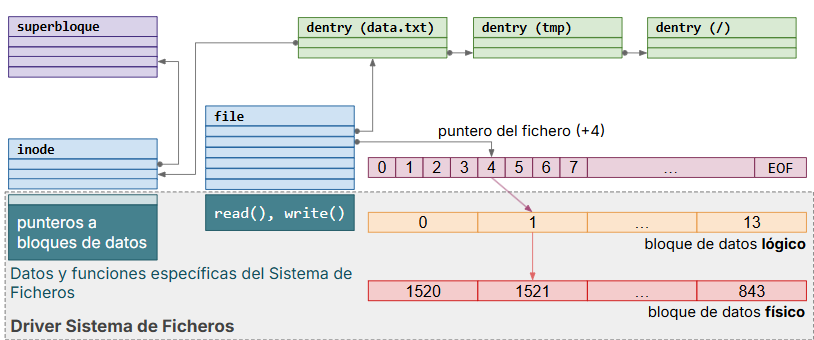

Como esto esta programado en C no hay abstracción, por lo que hay punteros a bloques de datos y funciones (parte marcada de azul de la imagen).

### Gestion de bloques
#### Asignacion de bloques sistema indexado
- Localidad espacial.
Mantenimiento de los datos de un fichero juntos para mejorar el rendimiento.
> Los discos mecánicos no tienen que mover la cabeza lectora.

> SSD realiza menos operaciones de mayor tamaño. Optimizando la asignacion de espacio en el disco.
- Fragmentación.
> Externa: Al vaciar y añadir bloques pueden quedar bloques vacíos (Como cuando en un aparcamiento en linea quedan huecos libres por sacar y meter coches).

> Interna: Espacio no utilizado del disco (desperdiciado) porque los datos ocupen menos que un bloque.

Buscamos un sistema de ficheros con localidad espacial y con una baja fracmentación Externa.
- Estrategias para evitar la fracmentación:
    - Extent. Muchos sistemas de ficheros cuando vas a asignar un bloque te dan un extent: bloque + tamaño a ocupar.
    Todos los bloques de un extent van a acabar juntos.
    
    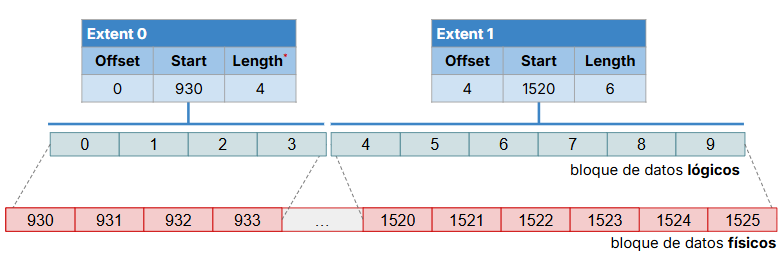
    - Asignacion retardada. Los bloques fisicos se asignan cuando se escribe en disco, asi es mucho mas rapido y preservas la localizacion.
    - Preasignación de bloques. Reserva bloques contiguos para un fichero. [ext4 multi-block allocator](https://www.kernel.org/doc/Documentation/filesystems/ext4/allocators.rst)
    - Agrupacion de bloques. las operaciones se agrupan en conjuntos de bloques.


Ejemplo:

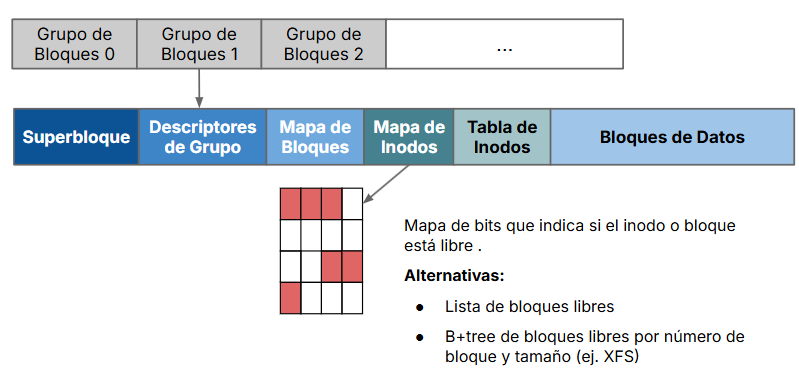

- Como agrupamos bloques:
    - Asignación continua. Reservamos un numero x de bloques para los bloques de datos de ficheros.
        - No se usa para los sistemas de archivos generales, normalmente no sabes cuanto ocupa un bloque. 
        - Provoca fragmentación externa.
        - En un sistema de solo lectura es util ya que no importa la fragmentacion externa.
    - FAT. Se usa en cosas pequeñas.
        - Consiste en una lista en lazada de bloques.
        - Existe una tabla con el nº de bloque y el estado:

        | Bloque | Estado |
        |---|---|
        | 0 | FREE |
        | 1 | 4 |
        | 2 | BAD |
        | 3 | FREE |
        | 4 | FREE |

        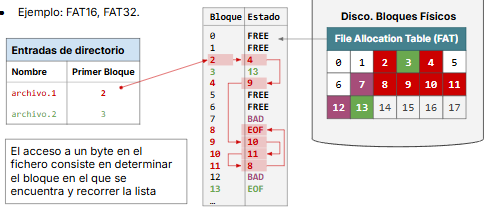



#### Arboles balanceados B+tree
Este tipo de almacenamiento de bloques se usa en los sistemas de ficheros actuales. Se caracteriza por:
- Arboles balanceados.
- Datos solo en hojas.
- Raiz + intermedios -> Claves.
- Tamaño reducido (4-5 niveles).
Ejemplo Grado 4. Insertar 2,3,5,11,17.
almacena bloques de 3 en 3 en forma tipo:

| Clave | Dato |
|---|---|
| logico | fisico|
| 2 | 1315 |

Arbol de ejemplo:

In [ ]:
import base64
from IPython.display import Image, display
#import mathplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(
    Image(
      url="https://mermaid.ink/img/"
      + base64_string
    )
  )

mm("""
flowchart TD
    raiz["`[5 _(puntero a *hoja Izq* )_ ; [ _(puntero a *hoja Der*)_]; __ ]`"]
    L["` [2 _(1315)_ ; 3 ;  __  ]`"]
    R["` [5 ; 11 ;  17  ]`"]
    raiz --> L
    raiz --> R
""")

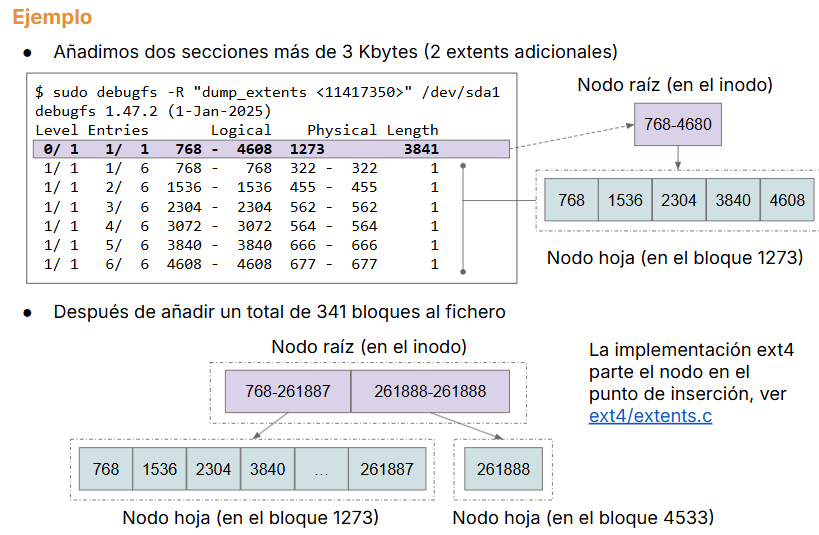

#### Ficheros dispersos
Ficheros parcialmente vacios que no se leen ni se escriben, se usan para reservar memoria.

# Tema 3 Procesos

Fork "clona" un proceso, utiliza las cosas del proceso raiz, hasta que se modifica.

Un proceso puede saber quien es su padre, pero un proceso no cuantos hijos tiene.

Ejecucion de un programa en un proceso a parte:
int exec() (mirar documentacion exec(3) que usa execve(2))

Ejemplo. ls -a -l
>execl (versión lista) "ls" (programa), {"ls", "-a", "-l"} pasa una lista con los argumentos.
>execv (versión vector) "ls" (programa), char ** Puntero a la pila de datos. 

- Versión con p, busca el path(p)
- Versión con e, especifica el entorno(e)

proceso init, primer proceso que arranca el kernel despues de inicializar el sistema.

### Envio de señales.
Interrupciones de software que iforman a un proceso de un evento de forma asincrona.

Señales mas importantes:
- SIGINT: Interrupción. Se puede generar con Ctrl+C (F=terminar proceso)
- SIGSTOP: Parar proceso. No se puede capturar, bloquear ni ignorar (P=parar)
- SIGTSTP: Parar proceso. Se puede generar con Ctrl+Z (P)
- SIGCONT: Reanudar proceso parado (continuar)
- SIGKILL (9): Terminación brusca. No se puede capturar, bloquear ni ignorar (F)
- SIGSEGV: Violación de segmento de datos (F y C=core, volcado de memoria)
- SIGTERM: Terminar proceso (F)
- SIGCHLD: Terminación del proceso hijo (I, ignorar)

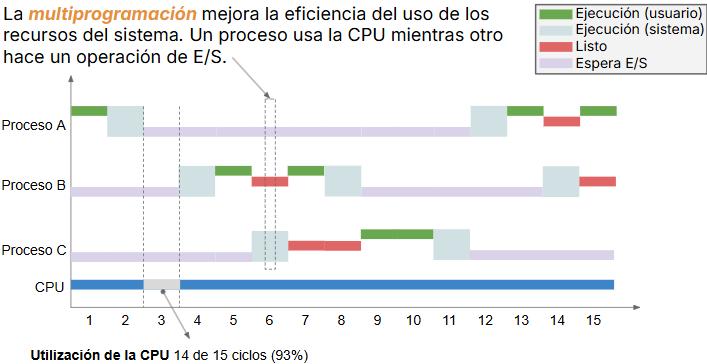

Planificacion:
- Largo plazo. Control de admisión de trabajos en el sistema (procesos que se pueden ejecutar). Hoy en dia no lo gestiona el sistema operativo.
- medio plazo. Mueve los procesos de memoria principal a secundaria (process swapping).
- corto plazo. Decide qué procesos, de los que están listos para ejecutarse, se ejecutarán a continuación en la CPU.

#### ¿A qué proceso asignamos la CPU?
Se ejecuta el planificador de forma periodica, a un intervalo de tiempo regular:

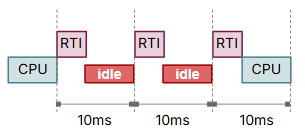

Una forma mas eficiente en cuanto energia para sistemas empotrados o moviles:

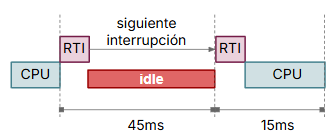

Entrar al modo idle es costoso, por esto es mas eficiente usar el modo Tickless cuando no hay tareas.

Determina cuándo se ejecuta el planificador para evaluar el estado del sistema:
- Cambio estado del proceso
    - La tarea se bloquea (E/S, futex, sleep,...) TASK_INTERRUPTIBLE o TASK_UNINTERRUPTIBLE
    - La tarea se desbloquea (E/S completada, futex desbloqueado…) TASK_RUNNING
- Creación o terminación de un proceso
    - Después de fork() o clone() se crea una nueva tarea que se añade a la cola de tareas ejecutables.
    - Cuando el proceso termina por cualquier causa: recepción de una señal (SIGKILL, SIGSEV...) o de forma voluntaria (_exit())
- Cesión voluntaria
    - El proceso cede la CPU (sched_yield(2))
    - El proceso cambia su prioridad (ej. nice(2))

#### ¿Que implica cambiar el contexto?
- Cambio de la memoria virtual
    - Actualización de los registros de memoria al contexto de memoria del nuevo proceso (mm_struct, ej. dirección de la tabla de páginas, caché asociadas… Tema 4)
- Cambio del contexto ejecución de la CPU (thread_struct)
    - Guardar los registros de propósito general, contador de programa, pila
    - Guardar los registros específicos (e.j. fpu)
    - Actualizar el puntero de pila a la nueva tarea
    - Cargar los registros de la nueva tarea
    - Continuar con la ejecución de la nueva tarea (en modo usuario)

Un planificador tiene como objetivo el de asignar recursos a los procesos tratando de optimizar un objetivo, algunos de estos pueden ser:
- Utilización: maximizar el tiempo que la CPU está en uso.
- Productividad: maximizar el número de procesos terminados por unidad de tiempo.
- Tiempo de respuesta: minimizar el tiempo desde que empieza el proceso hasta que produce la primera respuesta.
- Turnaround: minimizar el tiempo desde que entra el proceso en el sistema hasta que termina.
- Tiempo de espera: minimizar el tiempo total en la cola de espera. 
> Tiempo de espera = Turnaround - Tiempo CPU - Tiempo E/S
- Fairness (justicia): reparto equitativo de los recursos modulado por la prioridad y características de cada proceso.


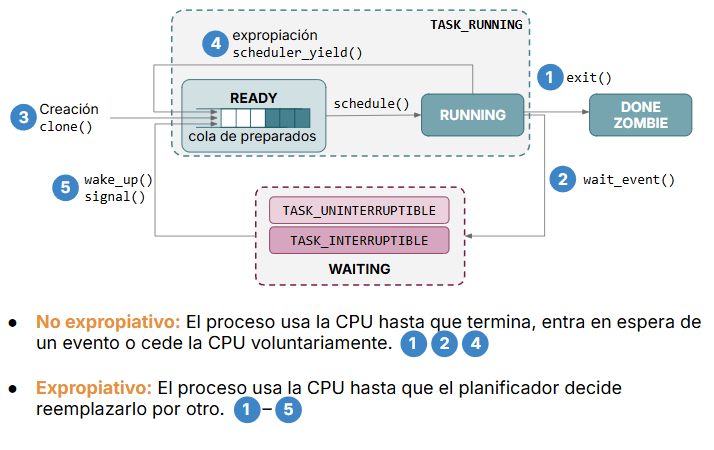

##### First Come First Serve (FCFS)
- Los procesos se planifican según el orden de entrada en la cola de preparados.
- Las tareas largas (T1) pueden bloquear otras más cortas (T2, T3) o aquellas que se interrumpen para E/S (T0)
- En general presenta baja productividad, y un alto tiempo de respuesta y latencia

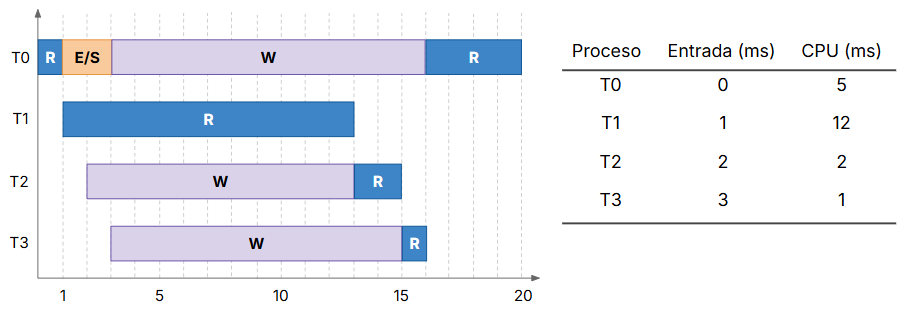

En t1  coge la cpu mientras esta la t0 en entrada/salida. Como no es expropiativo, T1 acapara la cpu hasta terminar.
> Cuando dos procesos entran a la vez a la cola de preparados, hay libertad para elegir cual se va a procesar primero.

Preguntas posibles:
- ¿Cual es el tiempo de espera de las tareas?
- ¿Cual es el tiempo de retorno de las tareas?
- ¿Cual es la productividad (3tareas/20ms en el ejemplo)?

##### Shortest Job First (SJF)
- Se planifican primero los procesos más cortos
- Favorece tareas interactivas, la productividad (más número de tareas completadas) y el tiempo medio de espera
- Es necesario conocer el perfil de ejecución de las tareas (predicción basada en las ciclos anteriores)
- Problemas de  inanición o injusticias (unfairness) para tareas largas (expropiativo)*

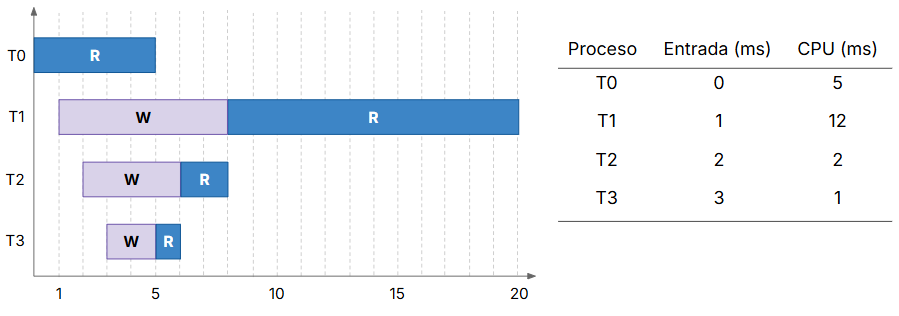

> La cola se ordena segun el tiempo que tarda en ejecutarse priorizando las tareas con menos tiempo de uso de la CPU.

*Los planificadores basados en prioridad presentan este problema 



##### Round Robin (RR)
- Combina FCFS con periodos fijos de tiempo (cuanto)
- Un proceso se ejecuta hasta que termina, se bloquea, cede la CPU o termina su cuanto. La cola de espera se gestiona como una cola FIFO circular.
- Asignación equitativa (fair) y bajo tiempo de espera para procesos de distinta duración
- La productividad se degrada con cuantos pequeños o procesos de la misma duración. Buen tiempo de respuesta para procesos cortos.
- Duración del cuanto: largos (→FCSF) cortos (↑cambios contexto)

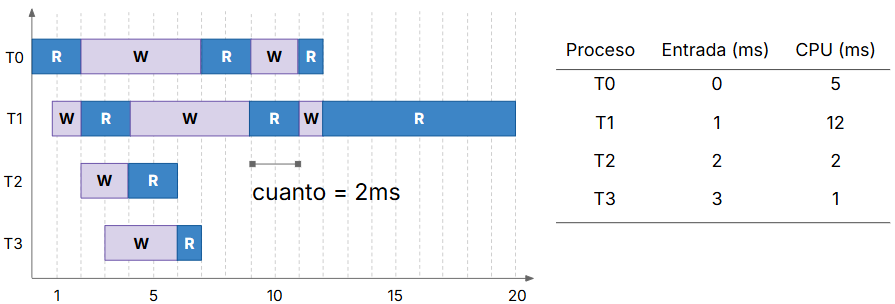

> Las tareas van a la cpu asignadas segun el orden de llegada, se les da un "cuanto" para usar la cpu, si no la termina pasa a la siguiente tarea y se vuelve a poner en la cola.

> Si el proceso es largo, hay muchos procesos, o el cuanto es muy pequeño, la tarea tarda demasiado.



##### Shortest Remaining Time First (SRTF)
- Combina SJF con periodos fijos de tiempo (cuanto)
- El siguiente trabajo es el de menor tiempo restante para la finalización
- Es necesario conocer el perfil de ejecución de las tareas.
- Problemas de inanición o injusticias (unfairness) para tareas largas

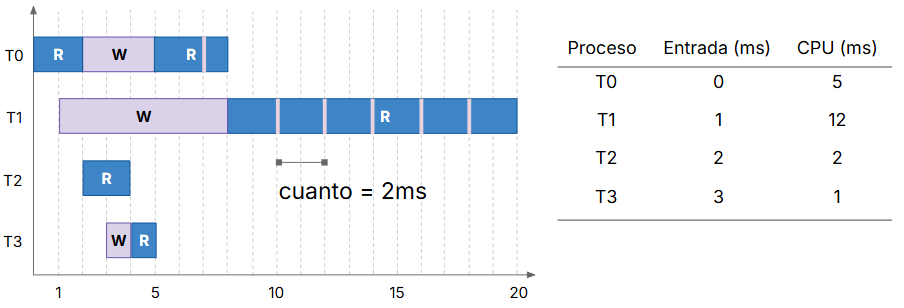

> Cuando el cuanto termina no tiene por que cambiar la tarea que esta usando la cpu

##### Colas Multinivel con Retroalimentación
Los algoritmos de planificacion deben usarse segun el tipo de tarea que se vaya a procesar, para esto 

Estructura

- Los trabajos se clasifican en diferentes colas de preparados. Cada cola tiene asociada una prioridad.
- [Regla 1] Los procesos con mayor prioridad (en colas de mayor prioridad) se ejecutan primero
- [Regla 2] Los procesos con la misma prioridad se ejecutan usando RR

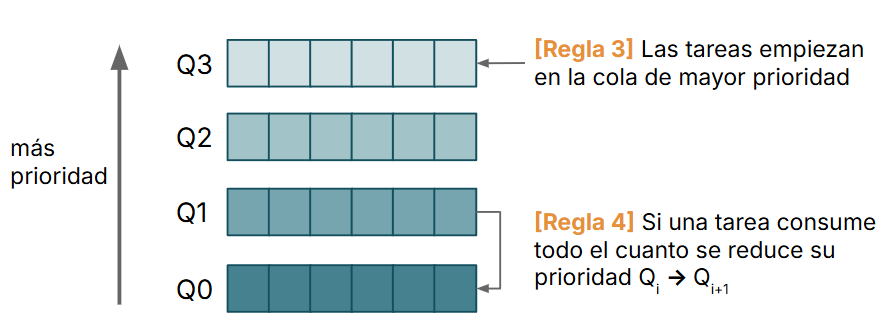

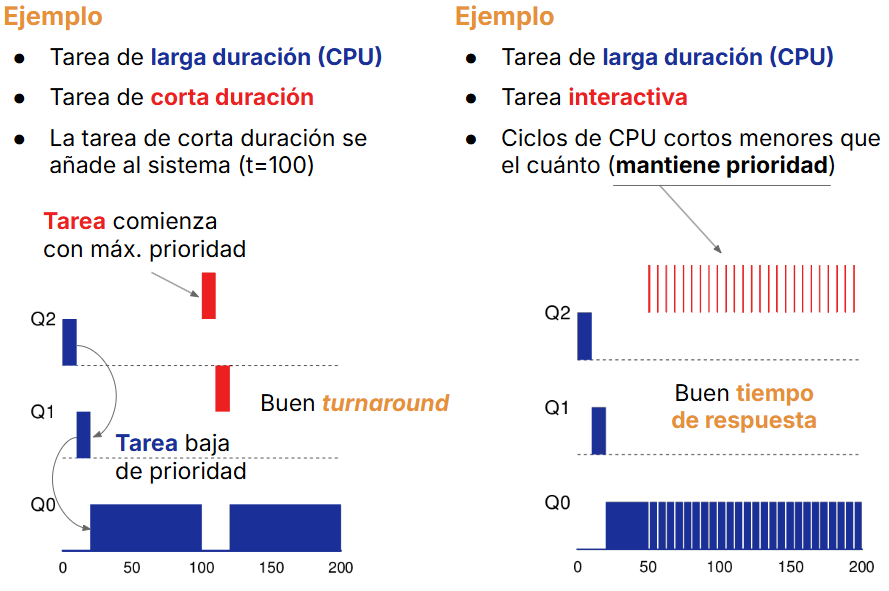

Problemas
- Inanición
    - Tareas intensivas en CPU (terminan en prioridad baja) con muchas tareas interactivas (prioridad alta)
    - Priority Boost. Periódicamente aumentar la prioridad de todas las tareas (mover a la cola más prioritaria) (Tiempo determinado como el cuanto)
- Abuso de las reglas de planificación
    - Si una tarea cede la CPU antes de que expire el cuanto no baja de prioridad
    - Accounting CPU. Si el tiempo de ejecución total en la cola Qi es mayor que el cuanto se reduce la prioridad.
- Las tareas no aumentan de prioridad
    - Una tarea intensiva en CPU seguirá en la mínima prioridad aunque pase a una fase interactiva.
    - Priority Boost

> Priority bust, hace que las tareas de baja prioridad puedan compoetir con las interactivas.

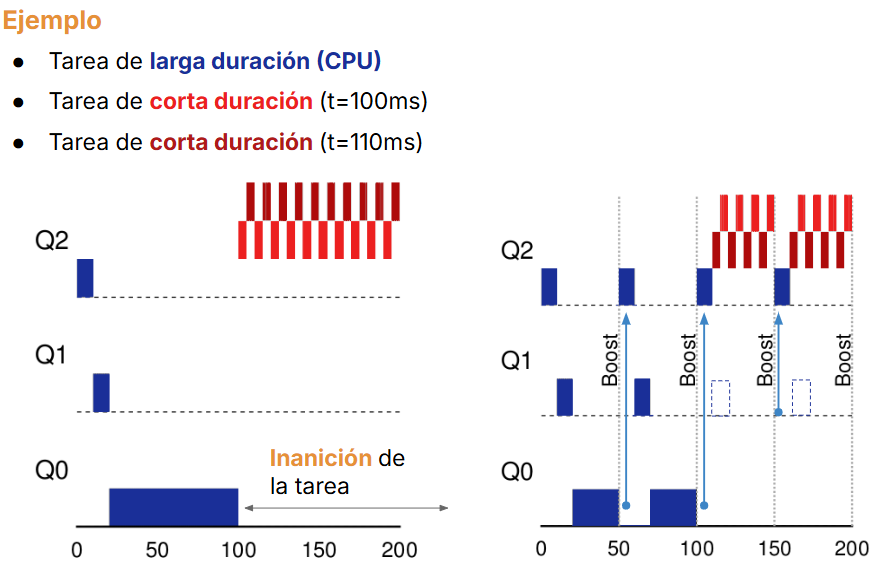


### Tema 4 Memoria

--- Apuntes de pablo ---

Memoria Virtual: abstraccion que proporciona a los procesos una memoria grande, lineal y privada. Para facilitar la vida a los programadores. Para dar un espacio de direcciones mas mayor. Permite compartir memoria con otros procesos tambien. El
SO gestiona el intercambio de informacion entre MP fisica y la secundaria en dsico(swap) (area de intercambio en Windows).
Los objetivos son:
- Sobresuscripcion: mayor memoria aparente. Para ejecutar procesos que usan mas memoria de la disponible.
- Multiprogramacion: ejecucion aislada de procesos (y el kernel). Cada proceso memoria aislada. Pero tabien se puede compartir. Como las librerias compartidas.
- Reubicacion: simplifica el desarrollo software permitiendo que los programas se puedan cargar en cualquier posicion. En EC cada variable tenia su direccion y habria que ir recompilando con cada cambio, com MV se encarga el SO de eso.

Memoria Virtual paginada: modelo mas usado frente a la segmentacion. Se divide la MV en paginas de tamaño determinado (4ks
en Linux). Cada pagina cargada tiene su region espejo (marco de pagina) en MP o en disco o asignacion tardia (no reserva
hasta que se lo piden). Hay varios niveles de indireccion de traducciones como habai con el SF.
La Tabla de Paginas contiene:
- (1) Marco de Pagina donde esta la pagina.
- (2) Presencia, si esta en MP o no para ir o no a buscarla.
- (3) Modificacion, para ver si hay que actualizarla o notificar a otros procesos sobre estas modificaciones.
- (4) Proteccion, si es de escritura o de lectura-escritura, o ejecutable (NX significa que no es ejecutable esa pagina).
- (5) Acceso, para las politicas de reemplazamiento.
- (6) Usuario, nivel de privilegio para ver quien puede acceder a esa pagina (usuario-supervisor).
- (7) Cache, si se puede llevar o no, si se activa el modo write-thought para que escriba directamente en MP.

La MMU es la unidad de gestion de Memoria. Coge el registro CR3, hace las indirecciones para sacar las direcciones para
acceder a las direcciones de MP o lanzar errorres si ocurren. Para acelerar las traducciones mas usadas o recientemente
usadas se creo la TLB (televe) (cache de traducciones). Una por CPU, junto a la Cache de Nivel 1.
Entonces lo importante, que hace el SO; se encarga de mantenera las tablas de paginas actualizadas, gestionar las excepciones
asgingando nuevas paginas de memorias (bajo demanda porque son lazys), traer paginas de la memoria secundaria, terminar el
proceso (SIGSEV) o accesos no validos (permisos) a memoria, configurar el MMU para que funione correctamente por ejemplo
cuando se cambia de contexto en un procesos refrescando la TLB y actualizando el MMU y configurar los accesos compartidos a
paginas de memoria. Puede hacer que las traducciones de distintos procesos apunten a la misma pagina como cuando se carga una
lirbreria dinamica que se pone en un pagina compartida. Si una pagina no es compartida es privada.


Tamaños de pagina: importante. Porque si son muy grandes puede haber fragmentacion interna = las paginas se quedan con
espacio sin usar. Al disminuir el tamaño puede fastiadiar a las traducciones llenando la TLB haciendola menos eficiente al
tener que cargar o echar paginas. Importante el tamaño tambien para la transferencia a Memoria Secundaria, mas gradne mas
tarda y viceversa.
En Linux: el tamaño por defecto es de 4kB {getconf PAGE_SIZE}, comando que devuelve el tamaño de pagina. Linux tiene un
metodo Huge Pages:
-Transparent Huge Pages: puede combinar paginas de 4kB en paginas de 2mB (que son 512 paginas) si estan continuas. Se puede
configurar con {madvise(2)} para decirle lo que vas a hacer con la memoria del proceso. Contiguas en direcciones fisicas.
-Huge Pages: se puede reservar al arrancar el Sistema una pool de paginas de 2mB o 1gB que las aplicacines pueden solicitar. 
Para bases de datos son interesantes o cuando iniciamos la Maquina Virtual.


Mapa de memoria de un proceso. Dividido en segmentos. Las importantes: .text (intrucciones), .rodata (cosntantes), .data (variables globales static inicializadas), .bss (variables globales static NO inicializadas):
//int numero = 21; // .data
//int resultado; // .bss
//const char *msg = "Hola\n"; // .rodata
//static in factor = 2; // (dentro de main) .data
//while(...){ if(...) } // .text
Segmentos de memoria: son areas de memoria contigua con varias paginas de MV (la estructura en Linux es vm_area_struct, que tiene tipo y permisos). Tipos: respaldadas por fichero (si no tiene son anonimas (no respaldadas por un fichero), heap, stack, memoria dinamica), privadas accesibles por solo el proceso o compartidas y accesibles por otros procesos. El heap crece hacia direcciones altas (del 0 al F) y la pila crece hacia direcciones bajas (del F al 0). En el mapa de memoria del procesos esta mapeado el kernel abajo del todo (abajo hacia arriba, las FFs), no es accesible por el usuario. Esta mappeado en todos los procesos para facilitar la llamada a las funciones del sistema. Despues de que algo pasase, las tablas de paginas de traducciones se separan para dar mas porteccion a los programas que de repente podian ver la TLB, entonces ahora mas seguro tras ese parche pero provoca mas fallos de TLB, cosa pocha pero segura. Esto se puede desactivar.
Si un segmento esta respaldado por un fichero, tiene un puntero que contiene el inodo, dentry y address_space. Ademas los segmentos tienen unas flags, unas operaciones (open(), close(),...)
Hay una tabla en las trasnparencias con como suelen ser los segmentos tipicos (.text es File, RX, SHARED y de tamaño fijo). No voy a copiar todos ni a hacer una tabla en Bloc de Notas.


El comando {ps} muestra la memoria consumida por un proceso...y no me ha dado tiempo a copair mas de esta diapositiva Con {top} en VIRT se ve la memoria virtual y con RES es la memoria reservada que es lo improtante porque en VIRT alomejor aparece un 32gB.


Al hacer un [fork()] se copian las paginas de memoria vitual pero inteligentemente con copy-on-write, no se copian a menos que se hayan modificado.
Al hacer execve carga un nuevo ejecutable reemplazando el espacio de direcciones.
Al llamar a br reservas heap???
Y existe mmap que vemos mañana.
----------

Las asignaciones de memoria estan ligadas al tamaño de pagina no puede dar menos que 1 pagina, 

Memoria de un Proceso
- fork(2). Crea un nuevo proceso copiando las páginas de memoria virtual del padre (Copy-On-Write)
- execve(2). Carga un nuevo ejecutable reemplazando el espacio de direcciones
- brk(2). Mueve la localización del program break (justo al final del segmento de datos), aumentando/disminuyendo el heap del proceso.
- mmap(2)/munmap(2)/mremap(2). Crea/destruye/redimensiona un segmento de diferentes tipos. 
> Nota: malloc(3) internamente usa brk(2) y mmap(2) según la cantidad de memoria solicitada (MMAP_THRESHOLD).
 
```
 void *mmap(void *addr,
              size_t length, 
              int prot,         // PROT_EXEC, PROT_READ, PROT_WRITE
              int flags,        // MAP_SHARED, MAP_PRIVATE, MAP_ANON
              int fd,           // Proyección de fichero
              off_t offset);
```
prot y debe ser coherente con el tamaño de la pagina

Si hago un unmap de una region de memoria que ha sido modificado, nada asegura que el contenido sea correcto, para ello hay que sincronizar la memoria:
```
   int munmap (void * addr , size_t len); 
   int msync (void * addr , size_t len , int flags)
````

> Malloc guarda un espacio de memoria dentro del heap para  hacer sus cosas.

- Malloc busca un espacio libre en orden dentro del heap, reserva la memoria y devuelve un puntero.
El malloc no hace ninguna llamada al sistema (Al ejecutar el strace se ve que no hay nada).

- Si pides mucha memoria, el malloc da un puntero a una region de memoria entera.
En este caso se mapea una region de memoria entera (Si se hace una llamada al sistema).

Datos
<------- brk(NULL)
Heap
<------- brk(dir)

cd al directorio del proceso, cat del map del proceso se ve la memoria del proceso.


Loa cache de pagina guarda ficheros/inodods/dispositivos de E/S en forma de bloques organizados en una estructura de arbol.

![image.png](attachment:image.png)


### Gestion de memoria principal
En un sistema de memoria virtual paginada el sistema de asignación es responsable de buscar marcos de páginas libres para un nuevo segmento.
- El algoritmo más común en este caso es Binary Buddy
    - Los marcos se organizan en listas de 2ORDEN marcos contiguos
    - Cuando no hay una región de ORDEN adecuado 
        - Se busca una región de ORDEN’ > ORDEN 
        - Se divide en dos compañeros (buddies, ORDEN’-1) asignando uno y colocando el otro en la lista de regiones libres.


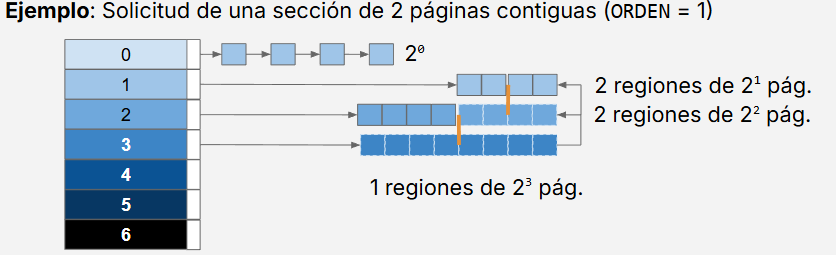

Partimos de una region de 8 paginas, y obtenemos 2 bloques de 4, hemos dividido uno en 2 bloques de 2 porque hemos dividido (necesitamos 2 paginas)

- Cuando no hay marcos libres en memoria principal, determina qué marco de página debe liberarse para alojar una nueva página.
- Objetivo: minimizar los fallos de página, eliminando las páginas que no se volverán a usar.
- Retención: Determinadas páginas de memoria no se pueden reemplazar (p.ej. kernel del SO). 
    - Las aplicaciones tiene acceso con la llamada mlock(2) 
    - Casos de uso: tiempo real y seguridad
- Ámbito:
    - Local: Sólo puede reemplazarse un marco asignado al proceso que causa fallo.
    - Global: Puede reemplazarse cualquier marco 

Algoritmos:FIFO, Reloj, LRU

#### FIFO
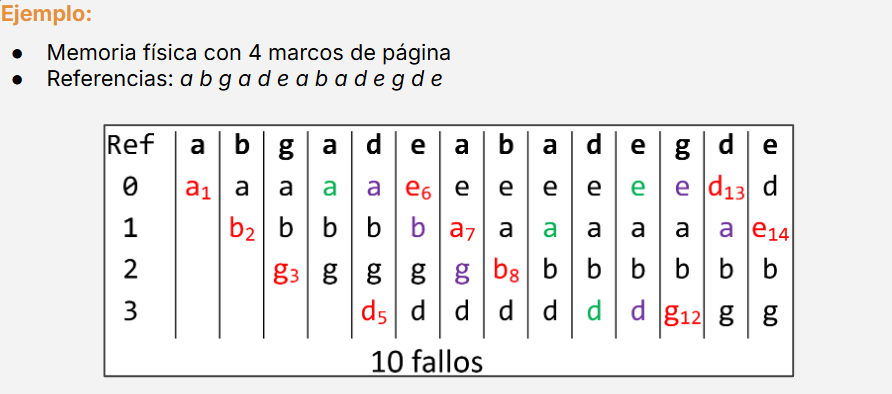


### Reloj
Es como una fifo pero con un conteo de referencias quitas uno si necesitas pagina nueva, y suma uno si haces referencia a esa pagina

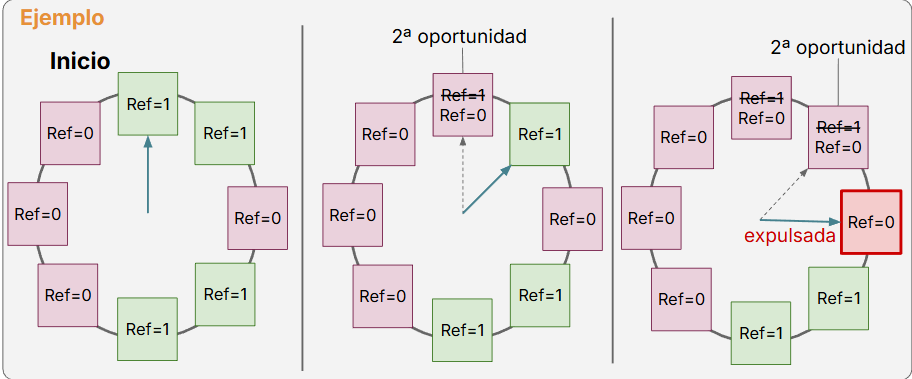

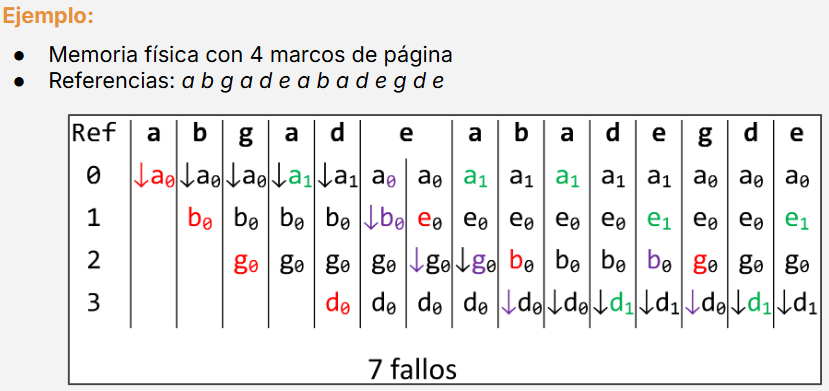

### LRU
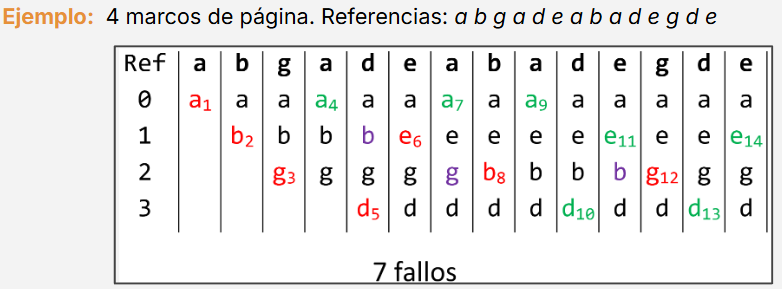

En linux tenemos una cola de paginas activas y otra de inactivas
- las paginas activas no se tocan a no ser que haya mas remedio 
- la cola de inactivas se sacan pginas siguiendo un FIFO


Los páginas de memoria no referenciadas no se eliminan directamente. Se mantienen como páginas reclamables (páginas inactiva)
- Si la página vuelve a referenciarse se mueve a la cola de páginas activa evitando que se elimine.
- Demonio de paginación (kswapd en Linux) actúa en función de umbrales de uso
    - Ejecuta la política de reemplazo para liberar marcos de página de memoria
    - Libera páginas anónimas (swap-out) o de la caché de páginas

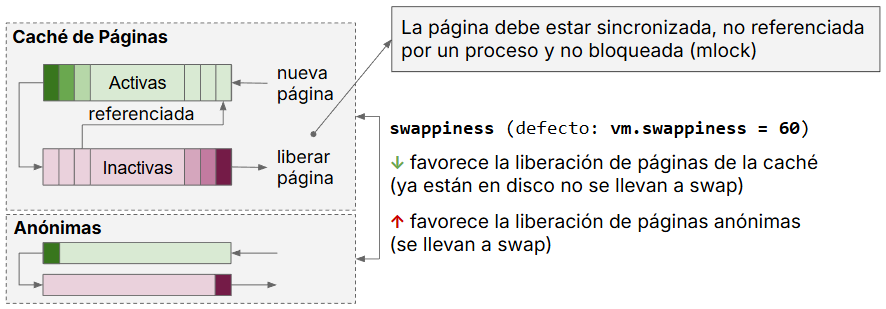


Out-of-Memory (OOM) Killer
- Mecanismo del núcleo usado cuando no se pueden satisfacer las peticiones de asignación de memoria (incluso después de reclamar páginas)
- Para recuperar el sistema se termina un proceso malo (badness) que liberará la memoria, usando una heurística que considera (según versión del kernel):
    - Tamaño de memoria residente (RSS) (↑)
    - Tiempo que el proceso ha estado en ejecución (↑)
    - Número de hijos del proceso (↑)
    - Nice del proceso (↑) (se preservan los procesos más prioritarios)
- Cada proceso en la PCB incluye los siguiente atributos proc_pid_oom_score(5):
    - oom_score: Procesos con mayor puntuación serán seleccionados antes por el OOM killer
    - oom_score_adj: Permite al administrador ajustar la puntuación para el OOM [-1000, 1000] según la importancia del proceso. Ver comando choom(1)

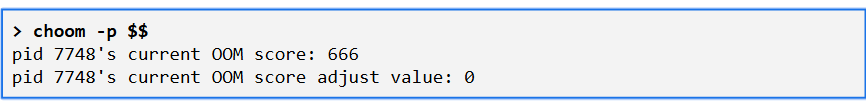

# Tema 5: threads.
## Concurrencia y paralelismo
Programacion asincrona: Mientras un hilo esta haciendo movidas el programador sigue haciendo cosas (Corutinas de C++).

#### Sincronizacion:
Mecanismos del sistema para coordinar la ejecucion de varios procesos o threads.

En el mismo sistema.
- Señales
- Ficheros mediante el uso de cerrojos, flock(2)
- Mutex y variables de condicion (hilos de un proceso)
- Semaforos
- Basados en UNIX domain socket(7)

Distintos sistemas.
- Basados en socket(7) TCP/UDP

- Proceso Unidad de ejecución con su espacio de memoria virtual y recursos asociados (tabla de ficheros, gestión de señales…)
- Thread Es un “proceso ligero” en el contexto de un proceso con el comparte algunos recursos (especialmente el espacio de direcciones) pero mantiene su propio contexto de ejecución.

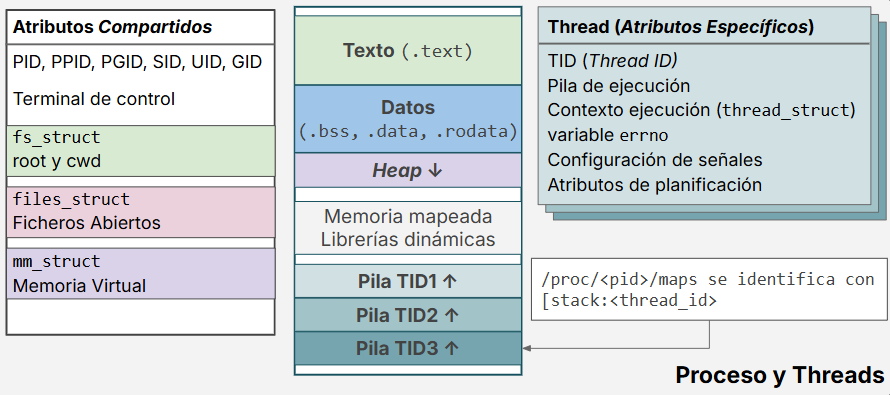

Los programas multi-thread ofrecen 
- Menor coste de creación (no tienes que estar mirando movidas de paginas y de movidas).
- Cambios de contexto más eficientes (Solo hay que cambiar la parte comun del thread).
- Modelo de compartición sencillo (los threads tienen la misma memoria virtual por lo que comparten datos).
- Un mecanismo eficaz para aprovechar el paralelismo dentro de un proceso, especialmente para aplicaciones intensivas en CPU.
Sin embargo:
- Requieren de mecanismos de sincronización (Hay que estar comprobando que las cosas a las que se acceden entre threads no se hayan modificado unos a otros)
- Deben usar versiones thread-safe o reentrantes (_r) de las funciones de librería.
- Difícil desarrollo y depuración (interbloqueos, condiciones de carrera…) (En general se suele preferir la programacion asincrona).
- La programación asíncrona es más eficiente para aplicaciones intensivas en E/S (concurrencia). 

- Procesos y Threads se representan por el mismo objeto del kernel task_struct (La llamada al sistema para crearlos es la misma, depende des si se le dedica espacio en memoria o no).
- Se crean con las misma llamada clone(2) especificando los recursos que se comparten (ver CLONE_THREAD)
- Todos los threads de un proceso tienen un identificador único (TID), coincide con el PID de task_struct y tienen el mismo Thread Group ID (TGID).
- Para el thread principal TID = TGID
- TGID es el identificador del thremostrado por ps como PID
- API POSIX Threads define el un conjunto de interfaces de programación (POSIX.1) para aplicaciones multi-thread.

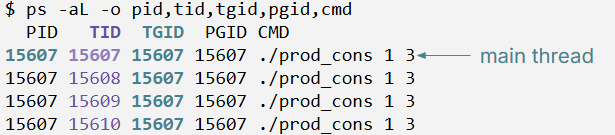

```
 int pthread_create(pthread_t *thread,
                    const pthread_attr_t *attr,
                    typeof(void *(void *)) *start,
                    void *arg);
```

- pthread_t Tipo de datos que representa al thread en el proceso.
    - Además de en la creación se puede obtener con pthread_self(3)
    - Tipo opaco, usar pthread_equal(3) para comparar)
- start Función ejecutada por el thread  void *(void *). El thread terminará: 
    - Retorne de la función start
    - Llame a la función pthread_exit(3)
    - Sea cancelado por otro thread pthread_cancel(3)(no usar en general)
    - El proceso termina (de cualquiera de las formas habituales) que terminará todos los threads del proceso.
-arg Puntero a los argumentos. Importante: El tiempo de vida debe ser igual al del thread.


Atributos de creación del thread pthread_attr_t
- Permiten fijar características sobre la planificación y terminación (ver pthread_attr_init(3)).
- PTHREAD_CREATE_JOINABLE (defecto). Permite la sincronización por otros threads.
    - pthread_join(3) espera la terminación de un thread y devuelve el valor de retorno.
    - Los recursos son destruidos cuando el thread se sincroniza.
- PTHREAD_CREATE_DETACHED
    - Cuando no es necesario controlar los threads creados.
    - Los recursos son destruidos cuando el thread termina.


int pthread_join(pthread_t thread, void **retval);

Este metodo espera a un thread concreto.

- retval dirección de la variable de retorno: 
    - El ciclo de vida de la variable debe superar la vida del thread
    - El valor se fija mediante la función pthread_exit(3)
- thread especifica el thread que se espera
    - Cualquier thread puede realizar la sincronización de otro
    - No se puede esperar a “cualquier thread” como en waitpid(2)

#### Región critica.
Invariante. Condición sobre el estado compartido que debe satisfacerse cuando se observa fuera de la región crítica.
- Ejemplo: En una lista cada elemento debe contener un puntero válido al siguiente elemento menos el último que será NULL

Región Crítica. (Solo un thread puede estar en una region critica)
- Áreas de código donde se modifica o se consulta el estado compartido del programa. 
- Las regiones críticas preservan los invariantes del programa permitiendo la ejecución exclusiva de un thread.
- Cuanto mas grande sea una region critica mas dificil de mantener el paralelismo.
- Ejemplo: Eliminar un elemento de la lista 

Predicados.  Expresión lógica que describen el estado de una invariante. El predicado indica que un thread puede ejecutarse.
- Ejemplo: La lista está vacía

Mutex. Permiten implementar regiones críticas asegurando que un único thread ejecuta el código de la región a la vez (mutual exclusion)
- Un mutex tiene dos estados cerrado (locked) y abierto (unlocked)
- La región crítica es la sección de código comprendida entre las llamadas lock y unlock
- Caso especial de los semáforos [Dijkstra 1968] (más difíciles de usar)

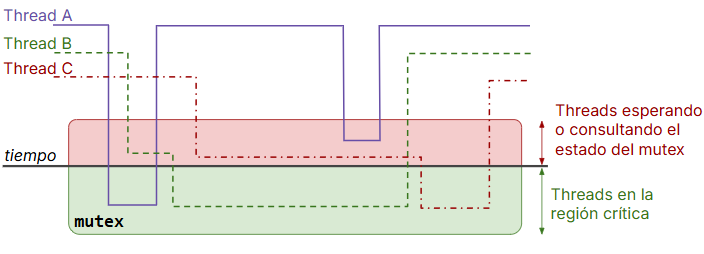



In [ ]:
pthread_mutex_t mutex = PTHREAD_MUTEX_INITIALIZER;
int pthread_mutex_init(pthread_mutex_t *mutex,
                       const pthread_mutexattr_t *attr);
int pthread_mutex_destroy(pthread_mutex_t *mutex);


- attr Define el comportamiento del mutex respecto a los errores: 
    - deadlock Un thread no debe hacer lock() doble de un mutex
    - Un thread no debe hacer unlock() de mutex de otros threads
    - No hacer de unlock() the un mutex en estado unlock()
- La función destroy sólo se puede llamar cuando otros threads no estén esperando en el mutex y el mutex está unlock 


In [ ]:
int pthread_mutex_lock(pthread_mutex_t *mutex);
int pthread_mutex_trylock(pthread_mutex_t *mutex);
int pthread_mutex_unlock(pthread_mutex_t *mutex);

#### Lector escritor
En este patrón de sincronización se asume un recurso compartido:
- Los accesos de lectura son mucho más frecuentes que los de escritura
- Se permite el acceso concurrente al recurso por varios lectores
- El acceso de los escritores debe ser exclusivo para mantener la consistencia de los datos.
- La tarea ejecutada por cada thread puede ser diferente
Ejemplos de aplicación:
- Caché compartidas
- Consulta del estado del global del juego
- Problemas de Inanición si se favorecen las lecturas o escrituras. En linux (pthread_rwlock_t) se favorece la productividad priorizando las lecturas.

In [ ]:
pthread_rwlock_t rwlock = PTHREAD_RWLOCK_INITIALIZER;
int pthread_rwlock_init(pthread_rwlock_t *rwlock,
                        const pthread_rwlockattr_t *attr);
int pthread_rwlock_destroy(pthread_rwlock_t *rwlock);


- Mismas consideraciones en la creación y destrucción que un pthread_mutex_t

In [ ]:
int pthread_rwlock_[rd|wr]lock(pthread_rwlock_t *lock);
int pthread_rwlock_try[rd|wr]lock(pthread_rwlock_t *lock);
int pthread_rwlock_unlock(pthread_lock_t *lock);

- Bloqueo de lectura (rdlock), el thread obtiene el mutex si no está bloqueado por un escritor ni hay escritores esperando (se puede bloquear varias veces)
- Bloqueo de escritura (wrlock), el thread obtiene el mutex si ningún otro thread tiene un bloqueo de cualquier tipo (rd o wr).


#### Variable de condición.

Variable de Condición. Abstracción que permite bloquear y despertar threads según la evaluación de un predicado sobre variables (estado) compartido:
- Estado compartido, representado por variables del programa. Ejemplo: número de elementos en la lista
- Mutex, para actualizar el estado en una región crítica. Un thread despierta de la espera siempre con el mutex bloqueado (lock)
- Predicado, condición sobre el estado que se espera/señaliza. Ejemplo: elementos > 0


Una variable de condición esta asociada a una región critica. Los threads son capaces de notificar esta condicion

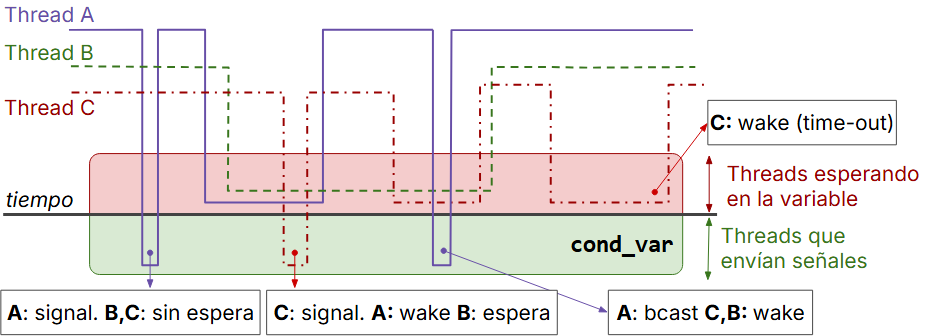

In [ ]:
pthread_cond_t cond = PTHREAD_COND_INITIALIZER;
int pthread_cond_init(pthread_cond_t *cond,
                      const pthread_condattr_t *attr);
int pthread_cond_destroy(pthread_cond_t *cond);

La función destroy sólo se puede llamar cuando otros threads no estén esperando el la variable de condición 

In [ ]:
int pthread_cond_wait(pthread_cond_t *cond, pthread_mutex_t *mutex);

- Versión timedwait permite especificar un timeout (struct timespec).
- El thread vuelve de la llamada con mutex en estado lock
- El thread debe comprobar el predicado antes de entrar en la espera y después de salir de ella.

In [ ]:
int pthread_cond_signal(pthread_cond_t *cond);
int pthread_cond_broadcast(pthread_cond_t *cond);

Despierta a un thread (cualquiera) esperando en la variable de condición. La versión broadcast despierta todos.